In [2]:
import c3d
import matplotlib.pyplot as plt
import numpy as np


In [3]:
ANGLES_TO_PLOT = [
    ('LHipAngles', 'RHipAngles'),
    ('LPelvisAngles', 'RPelvisAngles',),
    ('LKneeAngles', 'RKneeAngles'),
    ('LAnkleAngles', 'RAnkleAngles'),
    ('LFootProgressAngles', 'RFootProgressAngles'),
]

with open('data_2.c3d', 'rb') as handle:
    reader = c3d.Reader(handle)
    point_labels = [label.strip() for label in reader.point_labels]
    print(reader.analog_per_frame)
    analog_labels = [label.strip() for label in reader.analog_labels]

    data = list(reader.read_frames())


point_data = np.array([tuple_frame[1] for tuple_frame in data])
point_data = np.transpose(point_data, (2, 1, 0))
print(point_data.shape)

analog_data = np.array([tuple_frame[2] for tuple_frame in data])
analog_data = np.transpose(analog_data, (2, 1, 0))
print(analog_data.shape)


c:\Users\anjim\anaconda3\envs\backend_marcha\Lib\site-packages\c3d\c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


0


AttributeError: 'NoneType' object has no attribute 'string_array'

In [38]:
point_selected = 'LPelvisAngles'

X, Y, Z, _, _ = point_data[:, point_labels.index(point_selected), :]

ValueError: 'LPelvisAngles' is not in list

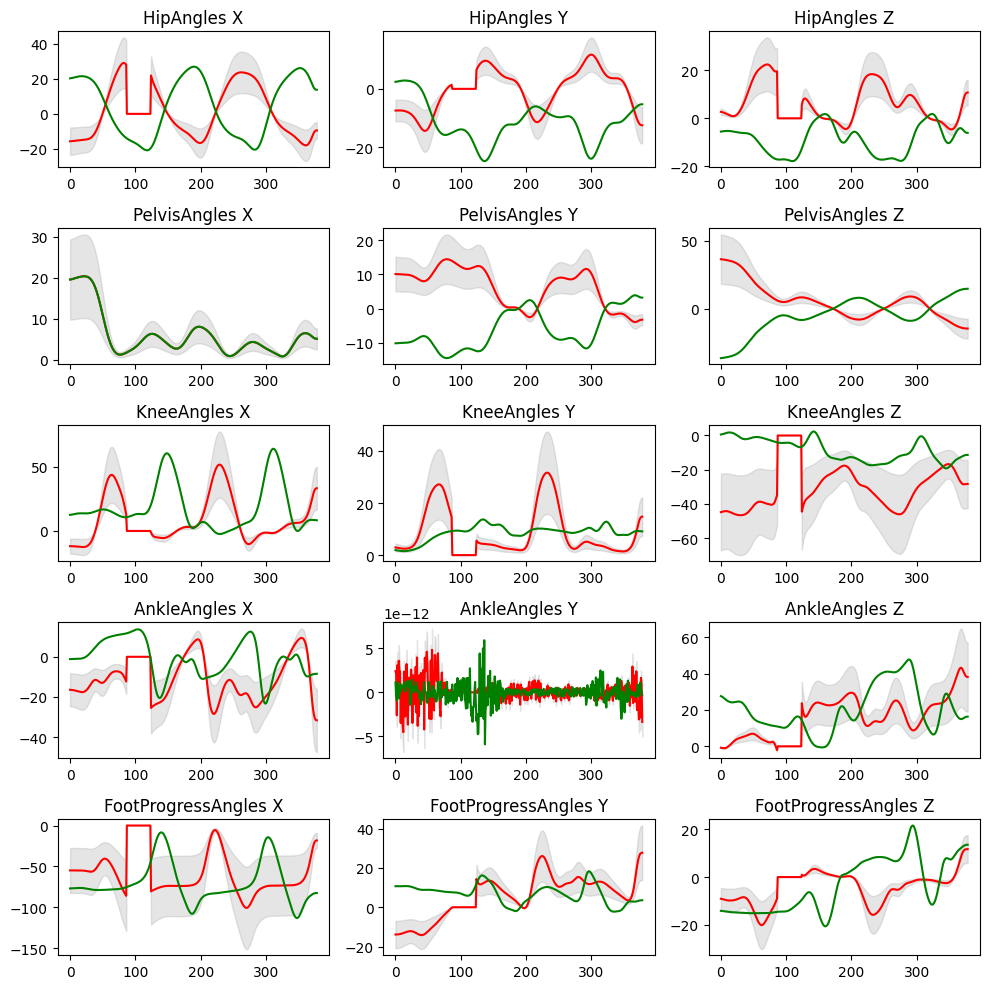

In [ ]:
ANGLES_TO_PLOT = [
    ('LHipAngles', 'RHipAngles'),
    ('LPelvisAngles', 'RPelvisAngles',),
    ('LKneeAngles', 'RKneeAngles'),
    ('LAnkleAngles', 'RAnkleAngles'),
    ('LFootProgressAngles', 'RFootProgressAngles'),
]

fig, axs = plt.subplots(5, 3, figsize=(10, 10))

for row, (l_angle_plot, r_angle_plot) in enumerate(ANGLES_TO_PLOT):

        X_l, Y_l, Z_l, _, _ = point_data[:, point_labels.index(l_angle_plot), :]
        X_r, Y_r, Z_r, _, _ = point_data[:, point_labels.index(r_angle_plot), :]

        title = l_angle_plot[1:]

        axs[row, 0].plot(X_l, 'r')
        axs[row, 0].plot(X_r, 'g')

        axs[row, 0].set_title(f'{title} X')
        axs[row, 0].fill_between(
                x= range(len(X_l)), 
                y1= X_l+X_l*0.5, 
                y2= X_l-X_l*0.5,
                color= "gray",
                alpha= 0.2)
        
        axs[row, 1].plot(Y_l, 'r')
        axs[row, 1].plot(Y_r, 'g')

        axs[row, 1].set_title(f'{title} Y')
        axs[row, 1].fill_between(
                x= range(len(Y_l)), 
                y1= Y_l+Y_l*0.5, 
                y2= Y_l-Y_l*0.5,
                color= "gray",
                alpha= 0.2)
        

        axs[row, 2].plot(Z_l, 'r')
        axs[row, 2].plot(Z_r, 'g')

        axs[row, 2].set_title(f'{title} Z')
        axs[row, 2].fill_between(
                x= range(len(Z_l)), 
                y1= Z_l+Z_l*0.5, 
                y2= Z_l-Z_l*0.5,
                color= "gray",
                alpha= 0.2)



plt.tight_layout()

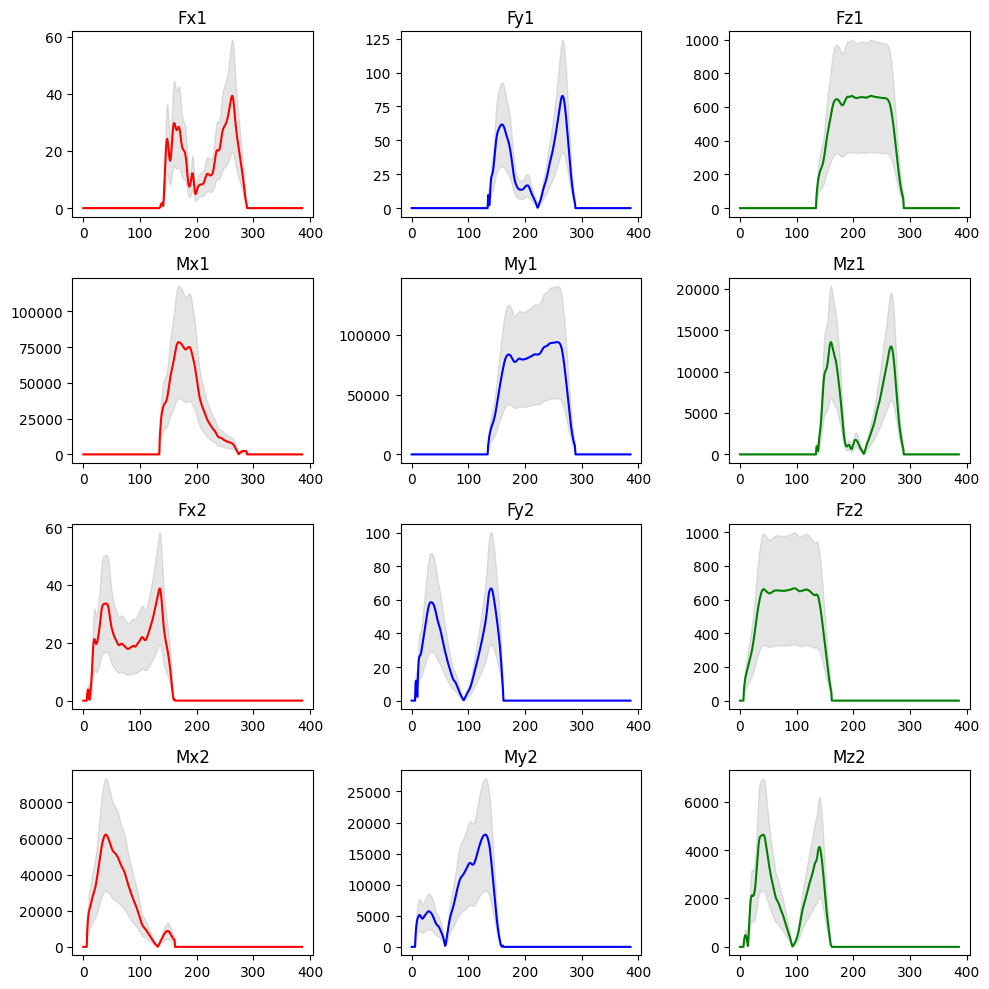

In [27]:
MEASURES_TO_PLOT = [
        ('Fx1', 'Fy1', 'Fz1'),
        ('Mx1', 'My1', 'Mz1'),
        ('Fx2', 'Fy2', 'Fz2'),
        ('Mx2', 'My2', 'Mz2'),
]


fig, axs = plt.subplots(4, 3, figsize=(10, 10))

for row, (x_measure, y_measure, z_measure) in enumerate(MEASURES_TO_PLOT):

        try:
                X = np.abs(analog_data[:, analog_labels.index(x_measure), :][0])
                Y = np.abs(analog_data[:, analog_labels.index(y_measure), :][0])
                Z = np.abs(analog_data[:, analog_labels.index(z_measure), :][0])
        except:
                print(f'No existe: {x_measure}, {y_measure}, {z_measure}')
                continue

        axs[row, 0].plot(X, 'r')
        axs[row, 0].set_title(f'{x_measure}')
        axs[row, 0].fill_between(
                x= range(len(X)), 
                y1= X+X*0.5, 
                y2= X-X*0.5,
                color= "gray",
                alpha= 0.2)
        
        axs[row, 1].plot(Y, 'b')
        axs[row, 1].set_title(f'{y_measure}')
        axs[row, 1].fill_between(
                x= range(len(Y)), 
                y1= Y+Y*0.5, 
                y2= Y-Y*0.5,
                color= "gray",
                alpha= 0.2)
                
        axs[row, 2].plot(Z, 'g')
        axs[row, 2].set_title(f'{z_measure}')
        axs[row, 2].fill_between(
                x= range(len(Z)), 
                y1= Z+Z*0.5, 
                y2= Z-Z*0.5,
                color= "gray",
                alpha= 0.2)
        
plt.tight_layout()